# Nuevos folds sin info de canal

In [1]:
import sys
sys.path.append('../')
import Datasets
from tqdm.notebook import tqdm
from dtreeviz.trees import *

/home/leandro/apps/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def make_partitions(df,
                    partitions,
                    stratify_columns,
                    independent_columns=None):
    if isinstance(partitions, int):
        partitions = [1.0 / partitions for p in range(partitions - 1)]
    elif sum(partitions) >= 1:
        raise Exception('Partitions proportions must sum less than 1')
    partitions.append(1 - sum(partitions))

    n_sets = len(partitions)

    partidx = {i: [] for i in range(n_sets)}

    if independent_columns is not None:
        groups = df.groupby(stratify_columns).groups.items()
        dist = {k: len(v) * np.array(partitions) for k, v in groups}
        part = {k: np.zeros(n_sets) for k, v in groups}

        for k, g in tqdm(df.groupby(independent_columns)):
            diffs = []
            for i, r in g.iterrows():
                group = tuple(r[stratify_columns].to_list())
                diffs.append(dist[group] - part[group])
            pix = np.max(np.array(diffs), 0).argmax()
            gix = np.max(np.array(diffs), 1).argmax()
            partidx[pix].extend(g.index)
            group = tuple(g.iloc[gix][stratify_columns].to_list())
            part[group][pix] += len(g)
    else:
        for k, g in df.groupby(stratify_columns):
            ix = np.random.permutation(
                sum([[i] * int(np.ceil(len(g) * p))
                     for i, p in enumerate(partitions)], []))[:len(g)]
            for i in range(n_sets):
                partidx[i].extend(g[ix == i].index)
    return partidx


In [3]:
datasetName, dfAudio, dfMetadata = Datasets.getQOMvsSPA( Datasets.DATASET_RAW, augment=False, split="family"  )

In [16]:
dfMetadata [ dfMetadata["sujeto"] == dfMetadata["sujeto"].unique()[7] ]["kfold"].unique()

IndexError: index 7 is out of bounds for axis 0 with size 7

In [54]:
.unique()
dfMetadata["kfold"] = dfMetadata.sujeto.astype("category").cat.codes

array([5, 6, 4, 0, 3, 1, 2], dtype=int8)

In [3]:
dfMetadata

filenames speakers speakers_agg  \
0     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      BRE        Mujer   
1     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
2     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
3     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
4     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
...                                                 ...      ...          ...   
3848  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH1         Niñe   
3849  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   
3850  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   
3851  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   
3852  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   

      durations  labels lang  sujeto sujeto-speakers-language  kfold  
0         0.840       0  spa   Tiago            Tiago-BRE-spa      0  
1         2.350       0  spa   Tiago            Tiago-NIL-spa      0  
2         2.500       0  spa   Tiago            Tiago-NIL-spa      0  
3         2.030       0  spa   Tiago            Tiago-NIL-spa      0  
4         1.080       0  spa   Tiago            Tiago-NIL-spa      0  
...         ...     ...  ...     ...                      ...    ...  
3848      3.998       1  qom  Nahuel           Nahuel-CH1-qom      3  
3849      3.000       1  qom  Nahuel           Nahuel-CH3-qom      3  
3850      2.086       1  qom  Nahuel           Nahuel-CH3-qom      3  
3851      3.000       1  qom  Nahuel           Nahuel-CH3-qom      3  
3852      3.114       1  qom  Nahuel           Nahuel-CH3-qom      3  

[3853 rows x 9 columns]

In [4]:
dfMetadata["speaker"] = dfMetadata.sujeto + "-" +  dfMetadata.speakers
dfMetadata

filenames speakers speakers_agg  \
0     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      BRE        Mujer   
1     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
2     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
3     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
4     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
...                                                 ...      ...          ...   
3848  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH1         Niñe   
3849  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   
3850  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   
3851  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   
3852  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   

      durations  labels lang  sujeto sujeto-speakers-language  kfold  \
0         0.840       0  spa   Tiago            Tiago-BRE-spa      0   
1         2.350       0  spa   Tiago            Tiago-NIL-spa      0   
2         2.500       0  spa   Tiago            Tiago-NIL-spa      0   
3         2.030       0  spa   Tiago            Tiago-NIL-spa      0   
4         1.080       0  spa   Tiago            Tiago-NIL-spa      0   
...         ...     ...  ...     ...                      ...    ...   
3848      3.998       1  qom  Nahuel           Nahuel-CH1-qom      3   
3849      3.000       1  qom  Nahuel           Nahuel-CH3-qom      3   
3850      2.086       1  qom  Nahuel           Nahuel-CH3-qom      3   
3851      3.000       1  qom  Nahuel           Nahuel-CH3-qom      3   
3852      3.114       1  qom  Nahuel           Nahuel-CH3-qom      3   

         speaker  
0      Tiago-BRE  
1      Tiago-NIL  
2      Tiago-NIL  
3      Tiago-NIL  
4      Tiago-NIL  
...          ...  
3848  Nahuel-CH1  
3849  Nahuel-CH3  
3850  Nahuel-CH3  
3851  Nahuel-CH3  
3852  Nahuel-CH3  

[3853 rows x 10 columns]

In [22]:
df = dfMetadata[["speaker", "lang", "speakers_agg", "sujeto"]]

In [23]:
df

speaker lang speakers_agg  sujeto
0      Tiago-BRE  spa        Mujer   Tiago
1      Tiago-NIL  spa        Mujer   Tiago
2      Tiago-NIL  spa        Mujer   Tiago
3      Tiago-NIL  spa        Mujer   Tiago
4      Tiago-NIL  spa        Mujer   Tiago
...          ...  ...          ...     ...
3848  Nahuel-CH1  qom         Niñe  Nahuel
3849  Nahuel-CH3  qom         Niñe  Nahuel
3850  Nahuel-CH3  qom         Niñe  Nahuel
3851  Nahuel-CH3  qom         Niñe  Nahuel
3852  Nahuel-CH3  qom         Niñe  Nahuel

[3853 rows x 4 columns]

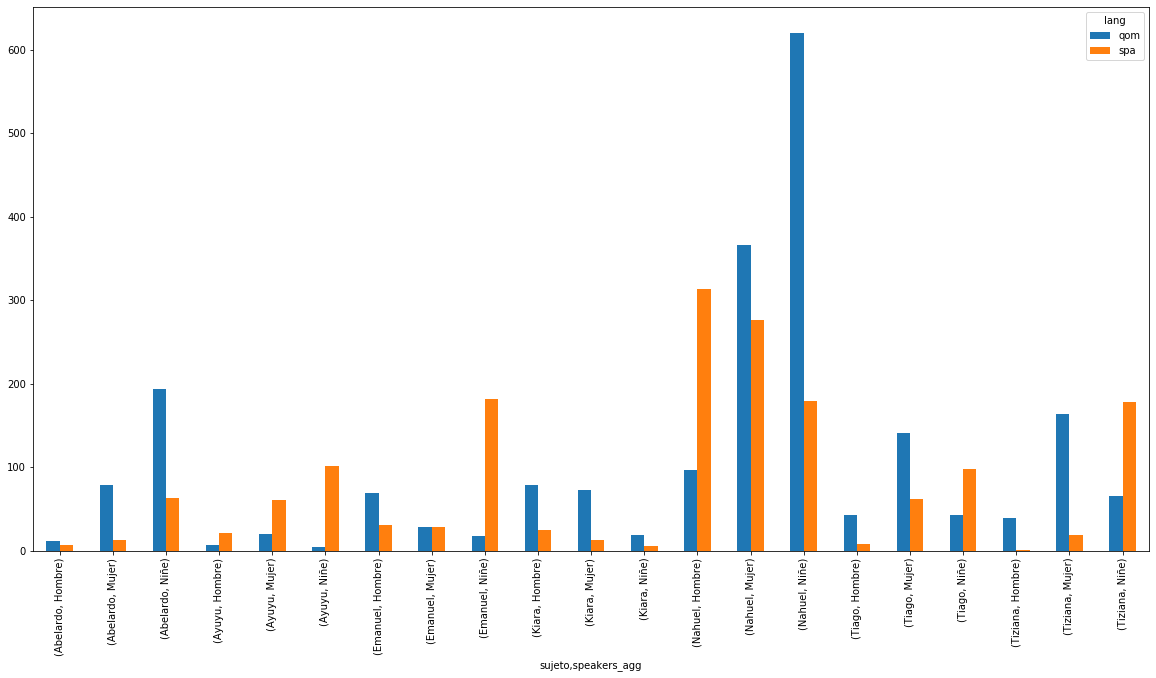

In [48]:
df.value_counts( ["sujeto", "speakers_agg", "lang"] ).unstack().plot.bar( figsize=(20,10) )

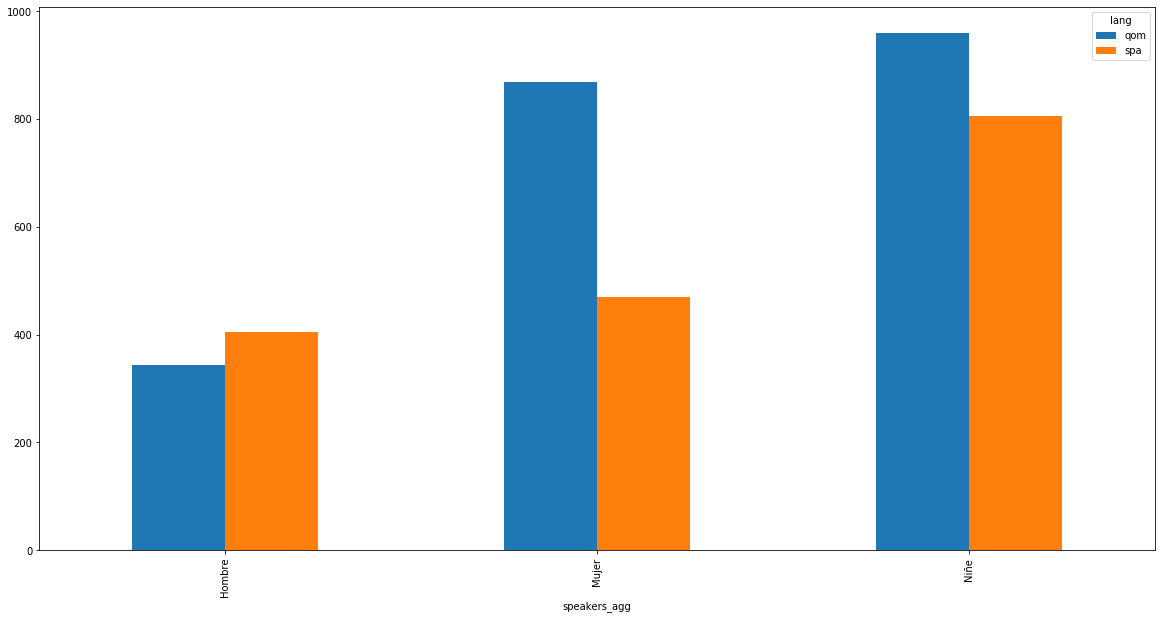

In [30]:
df.value_counts( ["speakers_agg", "lang"] ).unstack().plot.bar( figsize=(20,10) )

In [35]:
folds = make_partitions( df, [0.7], ["speakers_agg", "lang"], ["sujeto"] )

  0%|          | 0/7 [00:00<?, ?it/s]

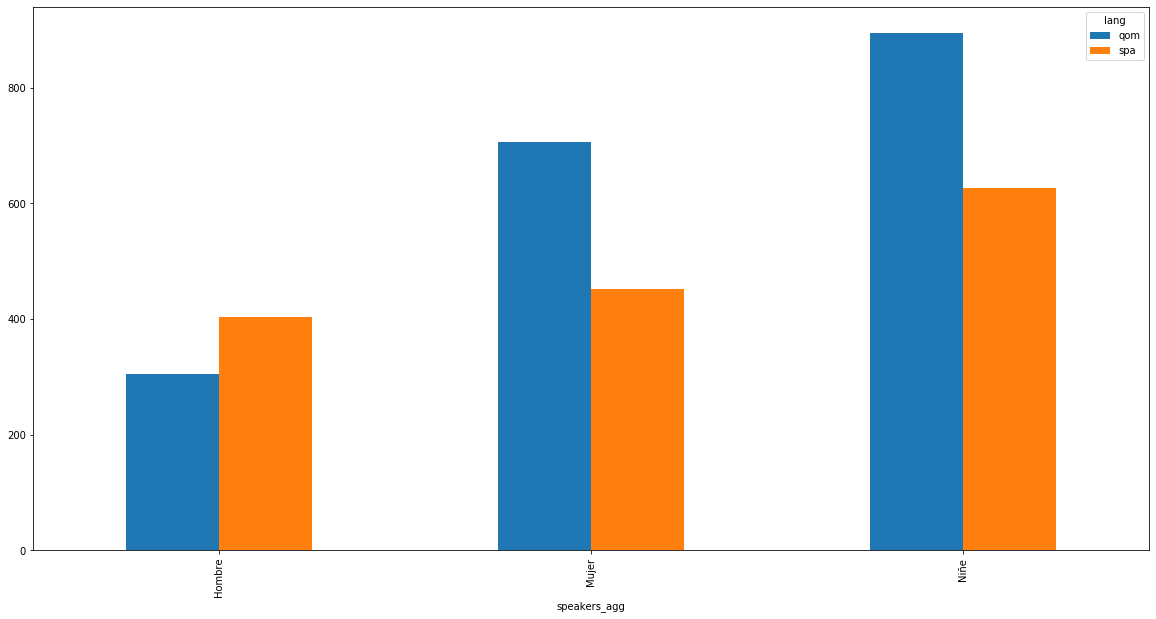

In [42]:
df.loc[ folds[0] ].value_counts( ["speakers_agg", "lang"] ).unstack().plot.bar( figsize=(20,10) )

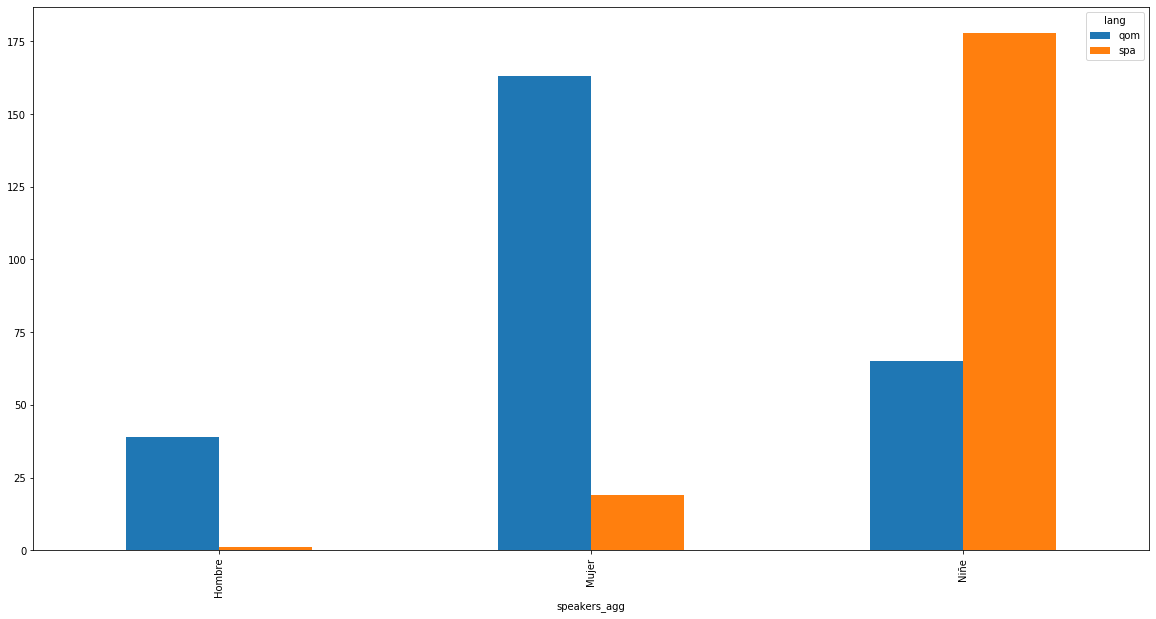

In [43]:
df.loc[ folds[1] ].value_counts( ["speakers_agg", "lang"] ).unstack().plot.bar( figsize=(20,10) )

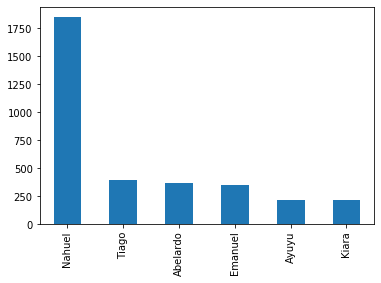

In [49]:
df.loc[ folds[0] ]["sujeto"].value_counts().plot.bar()

In [47]:
df.loc[ folds[1] ]["sujeto"].value_counts()

Tiziana    465
Name: sujeto, dtype: int64

In [17]:
df["speaker"].astype("category").cat.codes

0       46
1       58
2       58
3       58
4       58
        ..
3848    32
3849    34
3850    34
3851    34
3852    34
Length: 3853, dtype: int8

In [8]:
decisionTree = tree.DecisionTreeClassifier(max_depth=2)

X_train = np.array( dfMetadata[["speaker","speakers_agg"]] )
y_train = np.array( dfMetadata[["labels"]] ).squeeze()
decisionTree.fit( X_train, y_train )

ValueError: could not convert string to float: 'Tiago-BRE'